In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 
cwd = "..\\..\\"
cwd_Images_Raw = cwd + "\\Sentinel-2 Images Raw"
cwd_Images_Processed = cwd + "\\Sentinel-2 Images Processed"
cwd_Images_Results = cwd + "\\Sentinel-2 Images Results"

In [7]:
df_Roman = pd.read_excel(cwd + "\\Results\\Final (101 Sites) HI, Roman, Info.xlsx", sheet_name="Representativeness", header = 0)
df_Roman.head()

,Site,Internal Distance,External Distance,Rcv,Rse,Rst,Rsv,RAW Score,ST Score,Spatial Representativeness,Roman Metrics,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,ATGE,100,300,-0.102966,0.923035,-0.148640,0.284701,4.855959,0.907602,100-300,RAW or ST,NaN,NaN,"BACKUP: =IF(INDEX(Homogeneity!S3:S1000, MATCH(..."
1,ATGE,100,600,0.056577,0.932719,-0.187375,1.538509,8.837468,0.654933,100-600,RAW or ST,NaN,NaN,NaN
2,ATGE,100,900,0.051531,0.934329,-0.249955,2.734544,9.702866,0.513785,100-900,RAW or ST,NaN,NaN,NaN
3,ATGE,300,600,0.177857,0.952173,-0.045498,0.975952,2.811250,0.739677,300-600,RAW or ST,NaN,NaN,NaN
4,ATGE,300,900,0.172231,0.954540,-0.119004,1.906935,2.903070,0.592676,300-900,RAW or ST,NaN,NaN,NaN


# ALL RAW

In [13]:
df_Roman.describe()

,Internal Distance,External Distance,Rcv,Rse,Rst,Rsv,RAW Score,ST Score,Unnamed: 11,Unnamed: 12
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,0.0,0.0
mean,180.000000,660.000000,1.236166,0.930857,-0.088333,2.500298,4.253409,0.580654,NaN,NaN
std,98.076744,224.722051,3.392112,0.031082,0.322993,2.912739,14.745421,0.246599,NaN,NaN
min,100.000000,300.000000,-0.435568,0.833924,-0.813436,-0.403160,0.009041,0.044302,NaN,NaN
25%,100.000000,600.000000,0.130856,0.909791,-0.249955,0.576672,0.431956,0.378002,NaN,NaN
50%,100.000000,600.000000,0.415573,0.932233,-0.088369,1.526042,1.196153,0.583897,NaN,NaN
75%,300.000000,900.000000,1.157525,0.958559,0.000000,3.589145,3.273902,0.776783,NaN,NaN
max,300.000000,900.000000,55.301051,0.976881,3.606866,21.497592,221.760733,1.137635,NaN,NaN


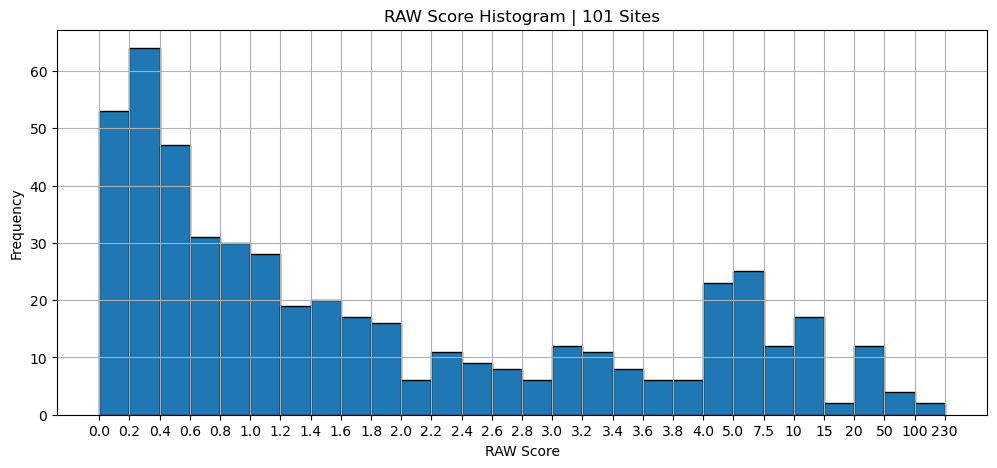

In [35]:
# Set figure size
plt.figure(figsize=(12,5))
plt.title("RAW Score Histogram | 101 Sites")

# Generate some sample data
data = df_Roman['RAW Score']

# Custom bin edges
bins = [float(i) / 5 for i in range(0,21,1)] + [5.0,7.5,10,15,20,50,100,230]

# Calculate the histogram manually
hist, edges = np.histogram(data, bins=bins)

# Custom x-tick positions for even spacing
even_positions = np.linspace(0, len(bins) - 1, len(bins))

# Plot custom bars at even positions
plt.bar(even_positions[:-1], hist, width=1, align='edge', edgecolor='black')

# Set the x-ticks to these positions
plt.gca().set_xticks(even_positions)
plt.gca().set_xticklabels(bins)

# Set labels
plt.xlabel('RAW Score')
plt.ylabel('Frequency')

# Display the plot
plt.grid()
plt.show()


# RAW Bad Fit

In [16]:
df_BadFit = df_Roman[df_Roman['Roman Metrics'] == 'RAW']
df_BadFit.describe()

,Internal Distance,External Distance,Rcv,Rse,Rst,Rsv,RAW Score,ST Score,Unnamed: 11,Unnamed: 12
count,220.000000,220.000000,220.000000,220.000000,2.200000e+02,220.000000,220.000000,220.000000,0.0,0.0
mean,180.000000,660.000000,1.148684,0.932517,-7.567749e-02,2.410515,4.430847,0.581447,NaN,NaN
std,98.203033,225.011415,2.457467,0.029570,2.546356e-01,2.492071,16.293509,0.244853,NaN,NaN
min,100.000000,300.000000,-0.435568,0.861427,-7.084694e-01,-0.403160,0.027217,0.106100,NaN,NaN
25%,100.000000,600.000000,0.096149,0.912129,-2.222131e-01,0.568884,0.397843,0.406313,NaN,NaN
50%,100.000000,600.000000,0.400581,0.932233,-4.839700e-02,1.654650,1.200524,0.564877,NaN,NaN
75%,300.000000,900.000000,1.257950,0.961183,1.387779e-16,3.422430,3.449739,0.766100,NaN,NaN
max,300.000000,900.000000,18.370698,0.976881,1.158814e+00,11.765083,221.760733,1.125497,NaN,NaN


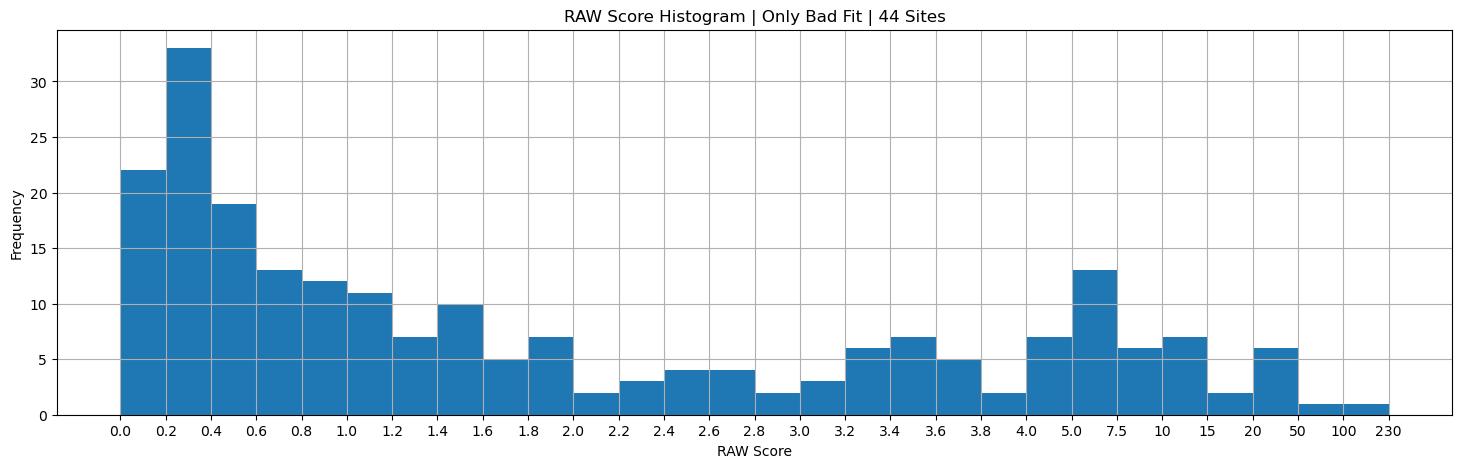

In [36]:
# Set figure size
plt.figure(figsize=(18,5))
plt.title("RAW Score Histogram | Only Bad Fit | 44 Sites")

# Generate some sample data
data = df_BadFit['RAW Score']

# Custom bin edges
bins = [float(i) / 5 for i in range(0,21,1)] + [5.0,7.5,10,15,20,50,100,230]

# Calculate the histogram manually
hist, edges = np.histogram(data, bins=bins)

# Custom x-tick positions for even spacing
even_positions = np.linspace(0, len(bins) - 1, len(bins))

# Plot custom bars at even positions
plt.bar(even_positions[:-1], hist, width=1, align='edge')

# Set the x-ticks to these positions
plt.gca().set_xticks(even_positions)
plt.gca().set_xticklabels(bins)

# Set labels
plt.xlabel('RAW Score')
plt.ylabel('Frequency')

# Display the plot
plt.grid()
plt.show()

# ST

In [20]:
df_GoodFit = df_Roman[df_Roman['Roman Metrics'] == 'RAW or ST']
df_GoodFit.describe()

,Internal Distance,External Distance,Rcv,Rse,Rst,Rsv,RAW Score,ST Score,Unnamed: 11,Unnamed: 12
count,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,0.0,0.0
mean,180.000000,660.000000,1.303695,0.929576,-0.098102,2.569605,4.116439,0.580042,NaN,NaN
std,98.151937,224.894341,3.968930,0.032193,0.367314,3.202517,13.457206,0.248367,NaN,NaN
min,100.000000,300.000000,-0.203630,0.833924,-0.813436,-0.352275,0.009041,0.044302,NaN,NaN
25%,100.000000,600.000000,0.158815,0.909136,-0.277786,0.592264,0.464601,0.373240,NaN,NaN
50%,100.000000,600.000000,0.420545,0.932233,-0.114257,1.499444,1.188933,0.592254,NaN,NaN
75%,300.000000,900.000000,1.076192,0.955404,0.000000,3.660037,3.053077,0.779585,NaN,NaN
max,300.000000,900.000000,55.301051,0.976881,3.606866,21.497592,172.494357,1.137635,NaN,NaN


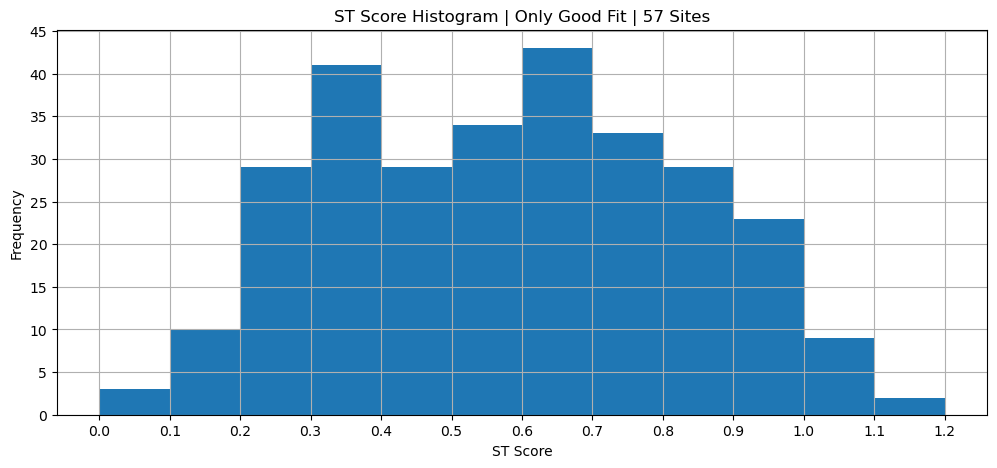

In [37]:
# Set figure size
plt.figure(figsize=(12,5))
plt.title("ST Score Histogram | Only Good Fit | 57 Sites")

# Generate some sample data
data = df_GoodFit['ST Score']

# Custom bin edges
bins = [float(i) / 10 for i in range(0,13,1)]
    
# Calculate the histogram manually
hist, bin_edges = np.histogram(data, bins=10) 

# Plot the histogram 
plt.hist(data, bins=bins)
         
#
plt.xticks(bins)
plt.yticks([0,5,10,15,20,25,30,35,40,45])

# Set labels
plt.xlabel('ST Score')
plt.ylabel('Frequency')

# Display the plot
plt.grid()
plt.show()


In [23]:
# plt.figure(figsize=(10,5))
# plt.title("Spatial Homogeneity Index (HI) Histogram")
# data = df['RAW Score']
# hist = sns.histplot(data, bins=bins)
# for patch in hist.patches: 
#     patch.set_alpha(0)
# even_positions = np.linspace(0, len(bins) - 1, len(bins))
# plt.gca().set_xticks(even_positions)
# plt.gca().set_xticklabels(bins)
# plt.bar(even_positions[:-1], hist, width=1, align='center', edgecolor='black')
# # for i in range(len(bins) - 1): 
# #     plt.bar(even_positions[i], height=np.sum((data >= bins[i]) & (data < bins[i + 1])), width=1, align='center', edgecolor='black')
# # for i, patch in enumerate(hist.patches):
# #     print(patch)
# #     patch.set_x(even_positions[i])
# #     print(patch)
# plt.xlim(2)
# plt.xlabel('HI')
# plt.ylabel('Frequency')
# plt.show()